In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
df=pd.read_csv("tesla_stocks.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [13]:
df.sort_index(inplace=True) 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200


In [15]:
df["MA_5"] = df["Close"].rolling(window=5).mean()
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["Lag_1"] = df["Close"].shift(1)
df["Lag_2"] = df["Close"].shift(2)
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA_5,MA_10,Lag_1,Lag_2
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,1.592667,NaN
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,1.588667,1.592667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,1.464000,1.588667
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.399867,NaN,1.280000,1.464000
...,...,...,...,...,...,...,...,...,...,...,...
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100,261.674002,262.279001,254.110001,261.070007
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600,259.158002,261.663002,259.320007,254.110001
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900,255.962003,259.902002,253.860001,259.320007
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200,253.688001,258.344002,251.449997,253.860001


In [17]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA_5,MA_10,Lag_1,Lag_2
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,1.144667,1.272267,1.136667,1.160000
10,2010-07-14,1.196000,1.343333,1.184000,1.322667,1.322667,62928000,1.198533,1.245267,1.209333,1.136667
11,2010-07-15,1.329333,1.433333,1.266667,1.326000,1.326000,56097000,1.230933,1.219000,1.322667,1.209333
12,2010-07-16,1.380000,1.420000,1.336667,1.376000,1.376000,39319500,1.274133,1.210200,1.326000,1.322667
13,2010-07-19,1.424667,1.483333,1.394667,1.460667,1.460667,37297500,1.338933,1.228267,1.376000,1.326000
...,...,...,...,...,...,...,...,...,...,...,...
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100,261.674002,262.279001,254.110001,261.070007
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600,259.158002,261.663002,259.320007,254.110001
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900,255.962003,259.902002,253.860001,259.320007
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200,253.688001,258.344002,251.449997,253.860001


In [35]:
X = df[["Open", "High", "Low", "Volume", "MA_5", "MA_10", "Lag_1", "Lag_2"]]
y = df["Close"].shift(-1) 

X = X.iloc[:-1]
y = y.iloc[:-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.01)
svr.fit(X_train, y_train)

SVR(C=100, epsilon=0.01, gamma=0.1)

In [37]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

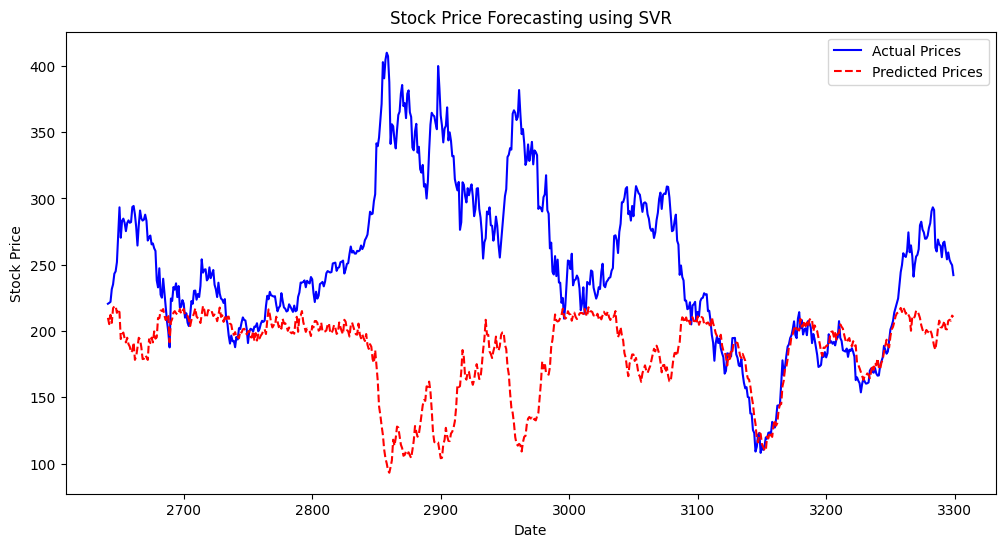

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size: -1], y_test, label="Actual Prices", color="blue")  # Fix x-axis
plt.plot(df.index[train_size: -1], y_pred, label="Predicted Prices", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecasting using SVR")
plt.legend()
plt.show()


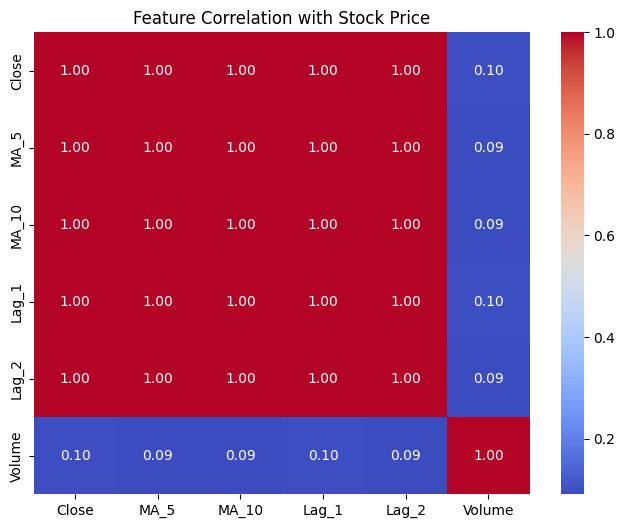

Mean Squared Error (MSE): 9989.4656

Feature Impact Analysis: Higher correlation suggests stronger impact on stock price.


In [43]:
correlation = df[["Close", "MA_5", "MA_10", "Lag_1", "Lag_2", "Volume"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Stock Price")
plt.show()

print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nFeature Impact Analysis: Higher correlation suggests stronger impact on stock price.")